<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/Lab11_Deeplearning02_LHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np

In [31]:
x_data=np.array([1,2,3,4,5,6,7,8,9,10],np.float32).reshape(5,2)
y_data=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],np.float32).reshape(5,3)

In [32]:
x_data.shape

(5, 2)

In [33]:
x_data.shape[1]

2

In [34]:
y_data.shape[1]

3

In [35]:
input_dim=x_data.shape[1]
units=y_data.shape[1]

input(nxi), output(nxj) i는 인풋 갯수 j는 아웃풋 갯수, n데이터 갯수
W와 b의 갯수는? W는 ixj개, [i,j] b는 j개 [1,j]

# Linear regression

In [36]:
learning_rate=1e-2

그렇다면 w와 b의 사이즈를 어떻게 정하는가? 일일이 i와 j의 크기를 넣어줘야 하나? 아니면 자동으로 정할 수 있는가?
x_data와 y_data의 dimension을 뽑을수 있으면 가능함.
- x_data.shape[숫자] : 해당숫자-1에 해당하는 dimension을 뽑음.

In [37]:
w_init=tf.random_normal_initializer()
b_init=tf.zeros_initializer()

In [38]:
w=tf.Variable(w_init(shape=(input_dim,units)),dtype='float32')

In [39]:
b=tf.Variable(b_init(shape=(units,)),dtype='float32')

In [40]:
for i in range(100):
  # loss
  with tf.GradientTape() as tape:
    hypothesis=tf.matmul(x_data,w)+b   #매트릭스 곱하기 : np.matmul()
    loss=tf.reduce_mean(tf.square(hypothesis-y_data))

  # gradient
  w_grad,b_grad=tape.gradient(loss,[w,b])

  # updata
  w.assign_sub(learning_rate*w_grad)
  b.assign_sub(learning_rate*b_grad)

  # display
  if i % 10==0:
    print('iteration {} loss {}'.format(i,loss))

iteration 0 loss 83.72911071777344
iteration 10 loss 0.16188274323940277
iteration 20 loss 0.15530696511268616
iteration 30 loss 0.14903376996517181
iteration 40 loss 0.1430138647556305
iteration 50 loss 0.137237086892128
iteration 60 loss 0.13169366121292114
iteration 70 loss 0.1263742297887802
iteration 80 loss 0.12126962095499039
iteration 90 loss 0.11637113988399506


In [41]:
w.numpy()

array([[0.7147543 , 0.69998133, 0.66637236],
       [0.621601  , 0.7523676 , 0.89946705]], dtype=float32)

In [42]:
b.numpy()

array([-0.06994438,  0.05385998,  0.17741883], dtype=float32)

In [43]:
w

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0.7147543 , 0.69998133, 0.66637236],
       [0.621601  , 0.7523676 , 0.89946705]], dtype=float32)>

In [44]:
tf.matmul(x_data,w)+b

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.8880119,  2.2585766,  2.6427255],
       [ 4.5607224,  5.163275 ,  5.774404 ],
       [ 7.233433 ,  8.067972 ,  8.906083 ],
       [ 9.906143 , 10.97267  , 12.037762 ],
       [12.578854 , 13.877367 , 15.16944  ]], dtype=float32)>

In [ ]:
y_data

array([1., 2., 3., 4., 5.], dtype=float32)

# subclassing

In [53]:
# model
class Model(tf.keras.layers.Layer):
  def __init__(self,input_dim,units):
    super(Model,self).__init__()

    self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')
    self.b=self.add_weight(shape=(units,),initializer='zeros')

  def call(self,inputs):
    return tf.matmul(inputs,self.w)+self.b

In [46]:
# loss
loss=tf.keras.losses.MeanSquaredError()

In [54]:
# gradient
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value=loss(targets,model(inputs))
  return tape.gradient(loss_value,[model.w, model.b])

In [55]:
# define
model=Model(input_dim,units)
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [56]:
# learning
for i in range(100):
  # gradient
  grads=grad(model,x_data,y_data)

  # updata
  optimizer.apply_gradients(zip(grads,[model.w,model.b]))

  # display

if 1%10==0:
  print('{}{}'.format(i.loss(y_data,model(x_data))))

In [57]:
model.w.numpy()

array([[0.7075614 , 0.65211004, 0.68265474],
       [0.630545  , 0.7959768 , 0.88459826]], dtype=float32)

In [58]:
model.b.numpy()

array([-0.09014215,  0.03764081,  0.18320295], dtype=float32)

In [59]:
model(x_data)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.8785093,  2.2817044,  2.6350543],
       [ 4.554722 ,  5.1778784,  5.76956  ],
       [ 7.230935 ,  8.074052 ,  8.904066 ],
       [ 9.907147 , 10.970225 , 12.038572 ],
       [12.583361 , 13.866399 , 15.173079 ]], dtype=float32)>

In [60]:
y_data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

# Sequential model

In [65]:
# model
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(units,kernel_initializer='random_normal'))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


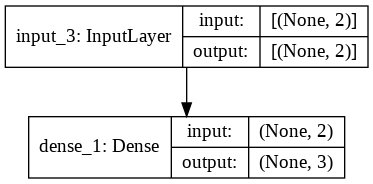

In [67]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [68]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss=tf.keras.losses.MeanSquaredError())

In [69]:
# learning
model.fit(x_data,y_data,epochs=100,verbose=0)

In [70]:
model.evaluate(x_data,y_data,verbose=1)

1/1 [==============================] - 0s 92ms/step - loss: 0.1194


0.11938508599996567

In [71]:
model.get_weights()

[array([[0.69085956, 0.71364295, 0.77970344],
        [0.64303446, 0.7399224 , 0.7973937 ]], dtype=float32),
 array([-0.07556048,  0.05848826,  0.207145  ], dtype=float32)]

In [72]:
y_data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

In [73]:
model.predict(x_data)

array([[ 1.901368 ,  2.251976 ,  2.5816357],
       [ 4.5691557,  5.1591067,  5.7358303],
       [ 7.236944 ,  8.066237 ,  8.890023 ],
       [ 9.904732 , 10.973368 , 12.044218 ],
       [12.57252  , 13.880499 , 15.198413 ]], dtype=float32)